In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('Nadia_Murad.jpg')
denis = cv2.imread('Denis_Mukwege.jpg')
solvay = cv2.imread('solvay_conference.jpg')

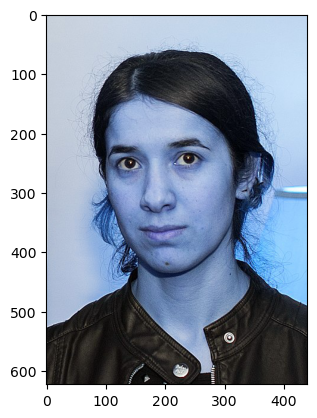

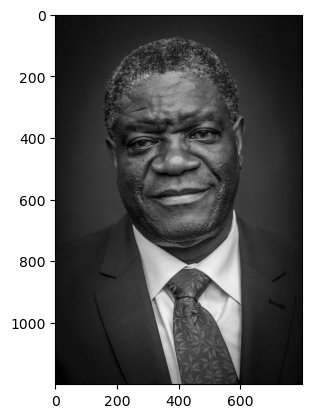

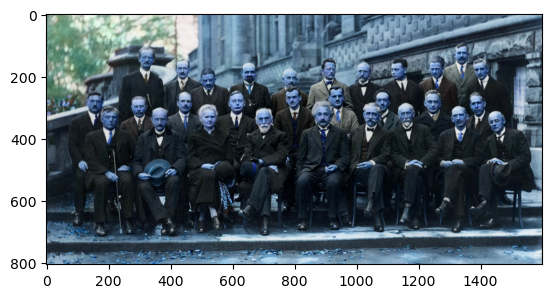

In [3]:
plt.imshow(nadia,cmap='gray')
plt.show()
plt.imshow(denis,cmap='gray')
plt.show()
plt.imshow(solvay,cmap='gray')
plt.show()

In [4]:
# create the classifier and pass the xml classifier
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [5]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) # returns x, y and width, height of rectangle
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255),10)
    return face_img # returns the updated face image

In [6]:
result = detect_face(denis)

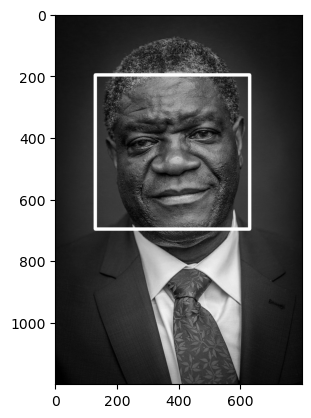

In [7]:
plt.imshow(result, cmap='gray')
plt.show()

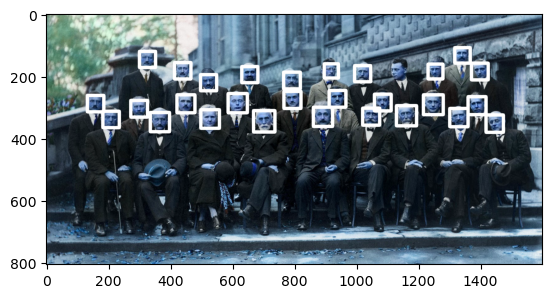

In [8]:
result = detect_face(solvay)
plt.imshow(result, cmap='gray')
plt.show()

In [9]:
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')


In [10]:
def detect_eyes(img):
    face_img = img.copy()
    eye_rects = eye_cascade.detectMultiScale(face_img,scaleFactor= 1.2, minNeighbors=5 )
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255),10)
    return face_img

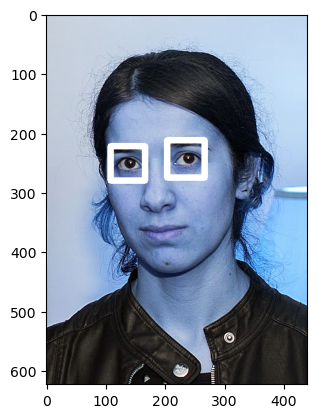

In [11]:
result= detect_eyes(nadia)
plt.imshow(result)
plt.show()

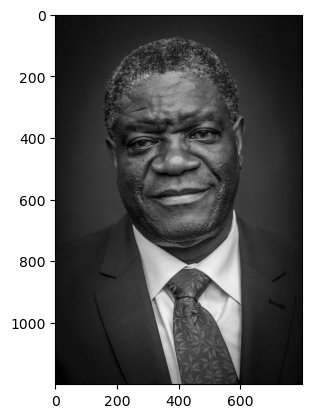

In [12]:
result = detect_eyes(denis)
plt.imshow(result, cmap='gray')
plt.show()

# Using Video

In [14]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read(0)
    frame = detect_face(frame)
    cv2.imshow('Video Face Detect',frame)
    k = cv2.waitKey(1)
    if k == 27:
        break
cap.release() 
cv2.destroyAllWindows()